## Import

### Importar Librearias

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from random import randint
from matplotlib.colors import ListedColormap

# Tarea numero 1

## Importar Data Set

In [ ]:
diabetes = pd.read_csv("diabetes.csv")

## Puntos

### Punto 1

¿El dataset cuenta con registros duplicados?, ¿Por qué es crucial identificar y manejar los valores
duplicados en un conjunto de datos?

In [ ]:
duplicados = diabetes[diabetes.duplicated()]
print(duplicados)

Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []


Es importante identificar las filas repetidas para garantizar la precisión, eficiencia, integridad y calidad de los datos, lo cual, a su vez, afecta la confiabilidad y validez de cualquier análisis de datos.

En otras palabras, las filas repetidas pueden llevar a resultados incorrectos o sesgados en el análisis de datos, así como también a problemas de rendimiento e integridad.

### Punto 2

¿El dataset cuenta con valores nulos? Realizando un análisis rápido mediante al resultado arrojado
mediante la función .describe() de su DataFrame, ¿Podría identificar si hay valores nulos presentes
en el dataset, justifique su respuesta?

In [ ]:
print(diabetes.shape)
print(diabetes.describe())

(768, 9)
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000         

Con la característica .shape podemos identificar la cantidad de filas y columnas en el conjunto de datos. Por lo tanto, utilizando la función .describe(), obtenemos una breve descripción de las características descriptivas más básicas. En esta descripción, aparece una característica llamada 'count' que indica cuántos datos pertenecen a cada característica de la base de datos. Si este recuento no coincide con la cantidad de filas, significa que existen datos nulos.

### Punto 3

Una vez identificado la cantidad de valores nulos presentes en su dataset, ¿Qué sugeriría para
rellenar los valores faltantes?, justifique su respuesta y ejecútelo en código explicando lo que ha
realizado.

Eliminar los valores nulos de una base de datos es esencial para garantizar la precisión, fiabilidad, integridad y calidad de los datos, lo que a su vez mejora la validez de los análisis y modelos basados en esos datos.

Para poder rellenar los valores nulos, hay que utilizar medidas de tendencia central como la moda, la media o la mediana. La moda sería la mejor medida para variables cualitativas, mientras que para variables numéricas usaría la media

In [ ]:
for key in diabetes:
  diabetes[key].fillna(diabetes[key].median(), inplace=True)


### Punto 4

Realice un único gráfico donde presente el histograma de cada una de las características para las
clases presentes, es decir al final debe de obtener un gráfico tipo subplot con 8 histogramas (Cada
histograma de cada característica y a su vez de cada clase). Ejecútelo en código.

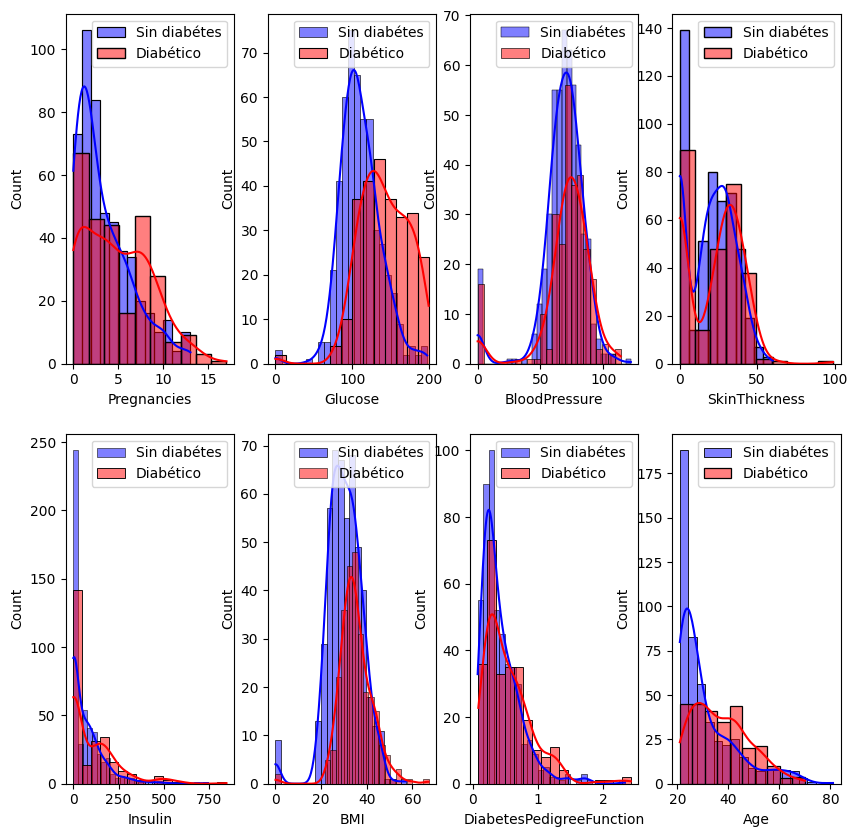

In [ ]:
sin_diabetes = diabetes[diabetes["Outcome"] == 0]
con_diabetes = diabetes[diabetes["Outcome"] == 1]
caracteristica = diabetes.columns[:-1]

# Crear un gráfico de 2x4 subplots para los histogramas
plt.figure(figsize=(10, 10))
for i, feature in enumerate(caracteristica, 1):
    plt.subplot(2, 4, i)
    sns.histplot(sin_diabetes[feature], color="blue", label="Sin diabétes", kde=True)
    sns.histplot(con_diabetes[feature], color="red", label="Diabético", kde=True)
    plt.xlabel(feature)
    plt.legend()

plt.show()


### Punto 5

Realice una correlación de las características presentes al DataFrame y preséntelo en forma
gráfica mediante un mapa de calor ¿Qué operación matemática se usa? ¿Qué puede concluir
comparando con el resultado obtenido en el ítem 4?.

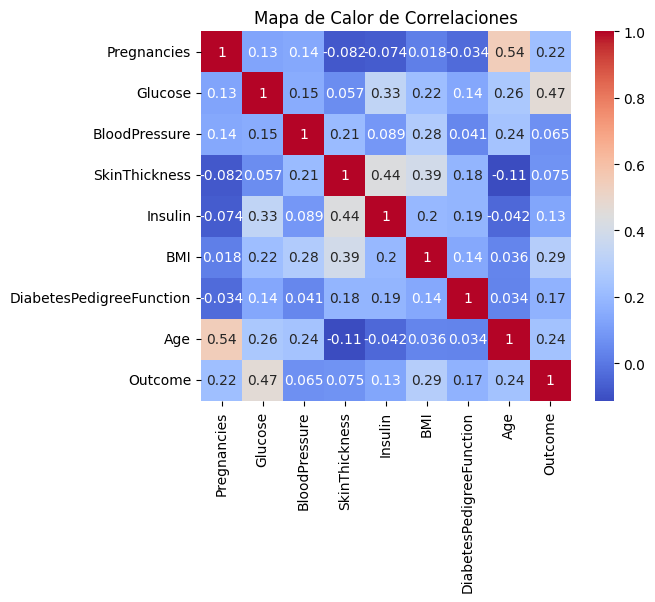

In [ ]:
correlation_matrix = diabetes.corr()
plt.figure()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", square=True)
plt.title("Mapa de Calor de Correlaciones")
plt.show()

Para calcular la matriz de correlación, se utiliza la fórmula que se presenta a continuación. En el numerador, se realiza la multiplicación de las sumas de las diferencias entre ambas variables. Mientras que en el denominador se realiza la multiplicación de las varianzas de los dos conjuntos de datos y se toma la raíz cuadrada del resultado.

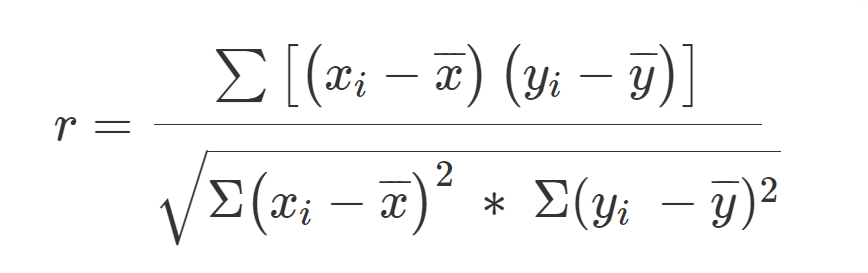

Dicha correlación se puede apreciar especialmente en los histogramas de la glucosa, donde a medida que aumenta la glucosa, aumenta el número de diabéticos, y a medida que disminuye la glucosa, hay menos diabéticos.

### Punto 6

Realizar un gráfico tipo Boxenplot para todas las características.

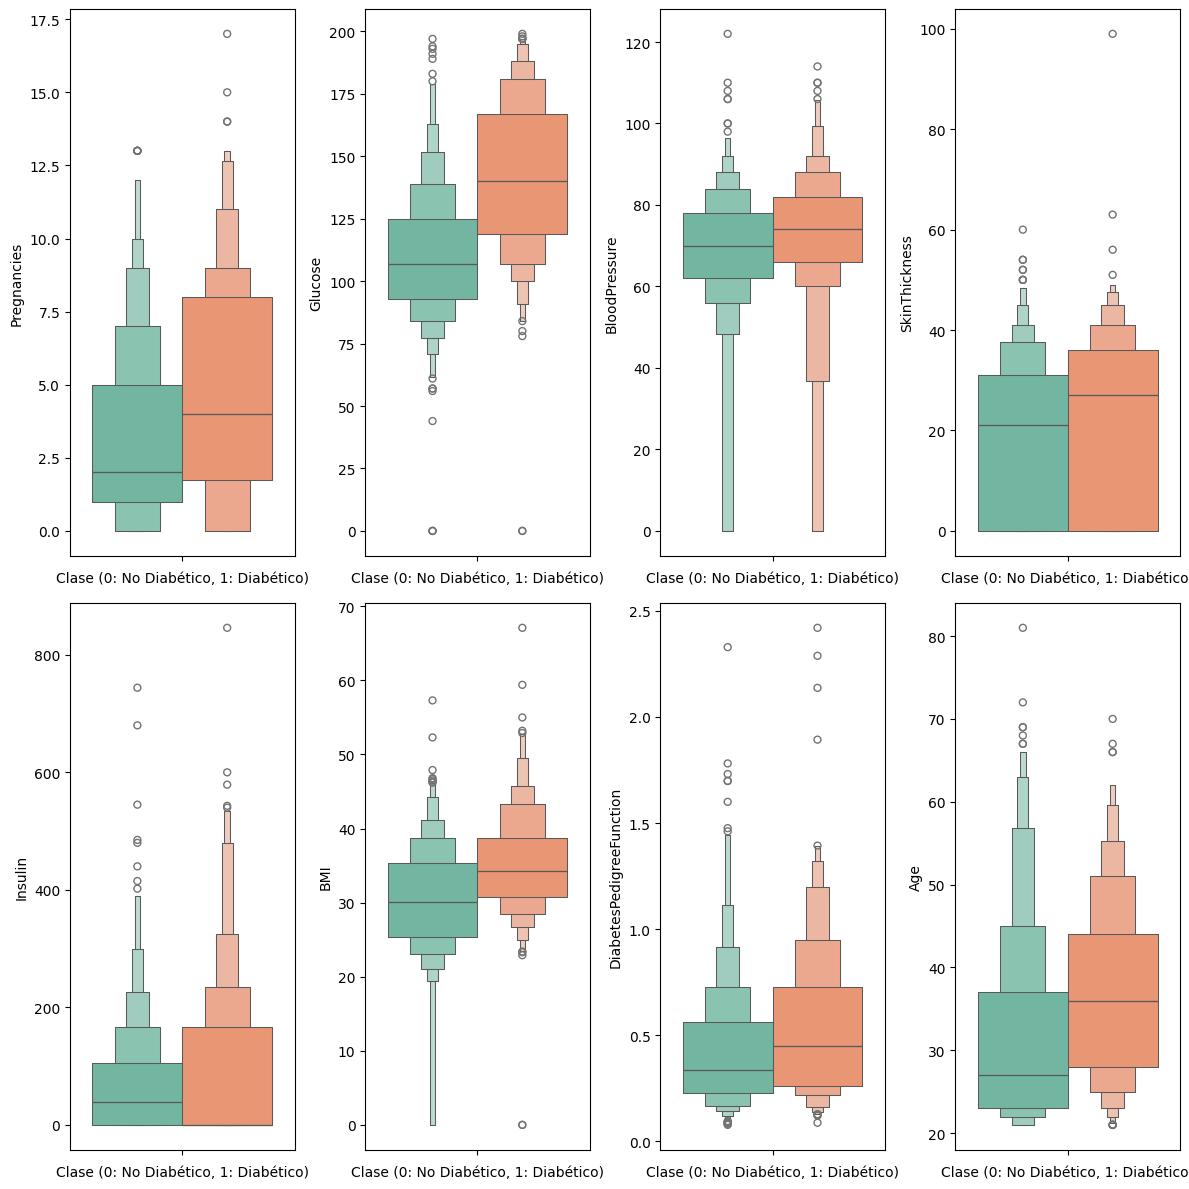

In [ ]:
caracteristica = diabetes.columns[:-1]

plt.figure(figsize=(12, 12))
for i, feature in enumerate(caracteristica, 1):
    plt.subplot(2, 4, i)
    sns.boxenplot(hue="Outcome", y=feature, data=diabetes, palette="Set2", legend=False)
    plt.xlabel("Clase (0: No Diabético, 1: Diabético)")
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


### Punto 7

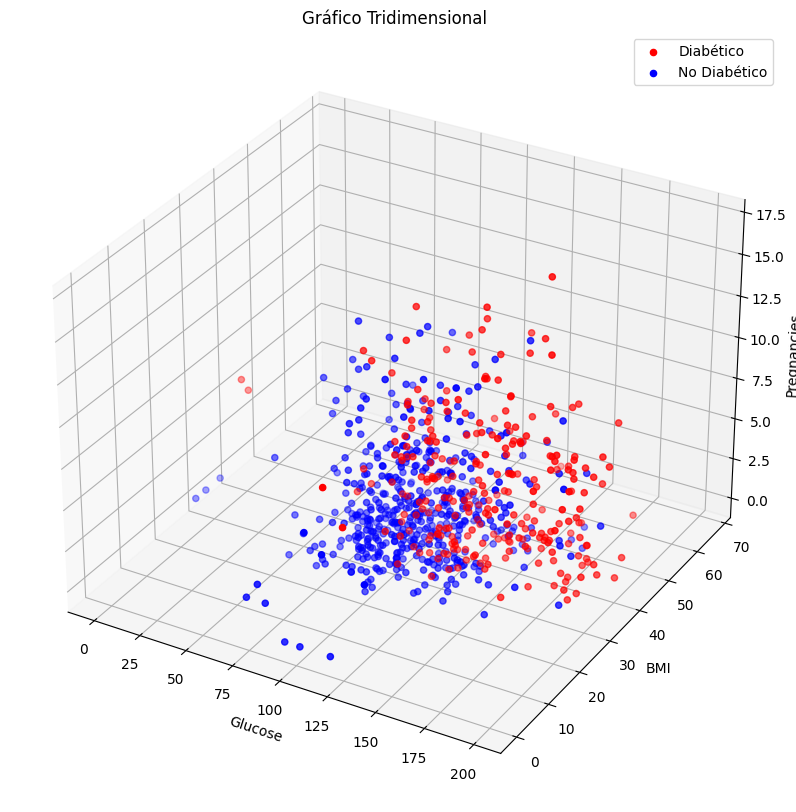

In [ ]:
sin_diabetes = diabetes[diabetes["Outcome"] == 0]
con_diabetes = diabetes[diabetes["Outcome"] == 1]
caracteristica = diabetes.columns[:-1]

# Crear la figura y el eje 3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")

# Datos para los ejes
diabetes_gen = [con_diabetes, sin_diabetes]
labels = ["Diabético", "No Diabético"]
llaves = ["Glucose", "BMI", "Pregnancies"]
color = ["red", "blue"]

for i in range(len(diabetes_gen)):
  x = diabetes_gen[i][llaves[0]]
  y = diabetes_gen[i][llaves[1]]
  z = diabetes_gen[i][llaves[2]]
  ax.scatter(x, y, z, c=color[i], label=labels[i])

ax.set_xlabel(llaves[0])
ax.set_ylabel(llaves[1])
ax.set_zlabel(llaves[2])

plt.title("Gráfico Tridimensional")
plt.legend()
plt.show()


# Tarea numero 2

## Creación del algoritmo del perceptron


In [ ]:
class Perceptron(object):
    """Clasificador Perceptron.

    Parámetros
    ------------
    eta : float
      Tasa de aprendizaje (entre 0.0 y 1.0)
    n_iter : int
      Número de iteraciones sobre el dataset.
    random_state : int
      Semilla del generador de números aleatorios para la inicialización del peso aleatorio.

    Atributos
    -----------
    w_ : Arreglo 1D
      Pesos antes del entrenamiento (Iniciales).
    errors_ : list
      Número de clasificaciones erróneas (actualizaciones) en cada época.

    """
    #FUNCIÓN PARA INICIALIZAR MI PERCEPTRON
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state


    #FUNCIÓN PARA ENTRENAR MI CONJUNTO DE DATOS USANDO MI PERCEPTRON
    def fit(self, X, y):
        """Datos de entrenamiento para ajustar.

        Parameters
        ----------
        X : {Tipo matriz}, Dimensión = [n_muestras, n_características]
          Training vectors, donde n_muestras es el número de muestras y
          n_características es el número de características.
        y : Tipo vector fila, shape = [n_samples]
          Target values.

        Retorna
        -------
        self : objeto

        """
        rgen = np.random.RandomState(self.random_state)

        """
        Genera el vector de pesos de manera aleatoria [Un peso W1 hasta ...Wn]
        Donde n, corresponde al número de caractarísticas de que presente las
        muestras del dataset + 1 elemento adicional que es el BIAS.
        """
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])

        """
        Incializa el vector de errores vacio, dado que lo llenará en función de
        cada iteración.
        """

        self.errors_ = []
        self.w_historical = [self.w_.copy()]  # Agrega los pesos iniciales a la lista

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
            self.w_historical.append(self.w_.copy())  # Guarda una copia de los pesos actuales en cada iteración
        return self

    def net_input(self, X):
        """Calcular la entrada NETA:"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Devolver el valor de predicción final (pasando por la función de activación)"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

## Import Data Set

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
'machine-learning-databases/iris/iris.data', header=None)
df.head()
print(df.describe())
print(df)

                0           1           2           3
count  150.000000  150.000000  150.000000  150.000000
mean     5.843333    3.054000    3.758667    1.198667
std      0.828066    0.433594    1.764420    0.763161
min      4.300000    2.000000    1.000000    0.100000
25%      5.100000    2.800000    1.600000    0.300000
50%      5.800000    3.000000    4.350000    1.300000
75%      6.400000    3.300000    5.100000    1.800000
max      7.900000    4.400000    6.900000    2.500000
       0    1    2    3               4
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    4.7  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]


## Separando los datos para el percepton con separación [1, -1]

In [ ]:
# Datos de entrada

X,Y = [],[]
for i in range(100):
  X.append([df[0][i], df[2][i]])

for key in df[4]:
  if key == "Iris-setosa": Y.append(1)
  elif key == "Iris-versicolor": Y.append(-1)

# Etiquetas de salida deseadas
X = np.array(X)
Y = np.array(Y)


### Grafica

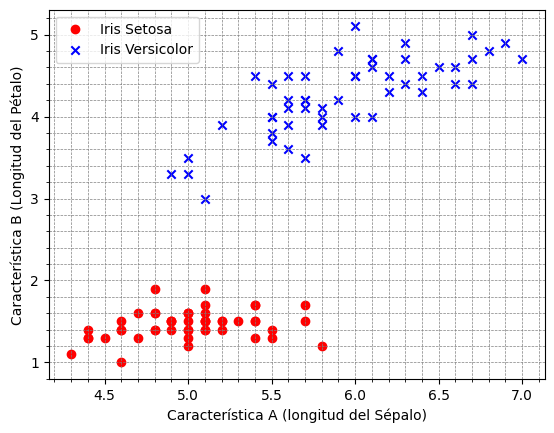

In [ ]:
# Graficar los datos de la tabla
def graficar(X, Y, val1, val2):
  xx = [X[i][0] for i in range(len(X)) if Y[i] == val1]
  yy = [X[i][1] for i in range(len(X)) if Y[i] == val1]
  plt.scatter(xx, yy,
              color='red', marker='o', label='Iris Setosa')
  xx = [X[i][0] for i in range(len(X)) if Y[i] == val2]
  yy = [X[i][1] for i in range(len(X)) if Y[i] == val2]
  plt.scatter(xx, yy,
              color='blue', marker='x', label='Iris Versicolor')

  #Activar la grilla (líneas menores de la cuadrícula)
  plt.minorticks_on()

  #Activar la grilla principal, mantener la principal y las líneas menores, estilo punteado --, color gris y grosor .5
  plt.grid(True, which='both', linestyle='--', color='gray', linewidth=0.5)

  #Colocar las etiquetas
  plt.xlabel('Característica A (longitud del Sépalo)')
  plt.ylabel('Característica B (Longitud del Pétalo)')

graficar(X, Y, 1, -1)
plt.legend()
plt.show()

1.2162434536366322 2.0338824358634966 2.0338824358634966
1.6162434536366326 2.713882435863497 2.713882435863497
2.0162434536366325 3.393882435863497 3.393882435863497
2.4162434536366324 4.073882435863494 4.073882435863494
2.8162434536366323 4.753882435863496 4.753882435863496
[array([ 1.21624345,  2.03388244, -5.46528172]), array([ 1.61624345,  2.71388244, -7.28528172]), array([ 2.01624345,  3.39388244, -9.10528172]), array([  2.41624345,   4.07388244, -10.92528172]), array([  2.81624345,   4.75388244, -12.74528172])]


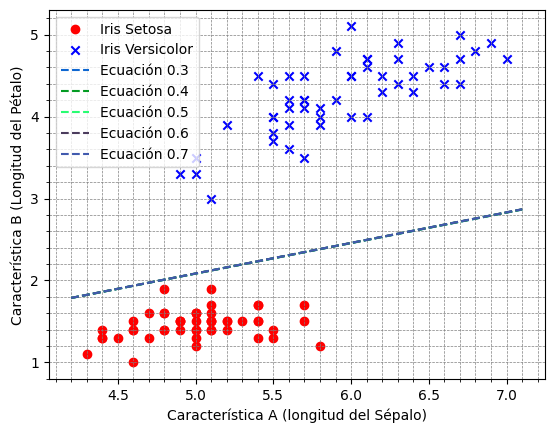

In [ ]:
def rgb2hex(r,g,b):
    """
    Función para transformar un color de rgb a hexadecimal
    Entradas: RGB(r,g,b): numero de cantidad de red, green y blue
    Salidas: codigo hexadecimal del color rgb
    """
    return "#{:02x}{:02x}{:02x}".format(r,g,b)

graficar(X, Y, 1, -1)

ppn = []
Lw_historical = []
i = 0.3

# Obtener valores mínimo y máximo de la columna 1 de X
x1_min = np.min(X[:, 0])
x1_max = np.max(X[:, 0])
while i <= 0.7:
  ppn.append(Perceptron(eta=i, n_iter=20))
  ppn[-1].fit(X,y)
  Lw_historical.append(ppn[-1].w_historical[-1])

  # Generar x1
  X1 = np.linspace(x1_min - 0.1, x1_max + 0.1, 100)
  b= Lw_historical[-1][0]
  w1= Lw_historical[-1][1]
  w2= Lw_historical[-1][2]
  print(b, w1, w1)

  # Calcular los valores correspondientes de X2
  X2 = -(w1/w2) * X1 - (b/w2)

  # Graficar la ecuación
  plt.plot(X1, X2, color=rgb2hex(randint(0, 255), randint(0, 255), randint(0, 255)),
           linestyle='--', label=f'Ecuación {i}')
  i += 0.1

print(Lw_historical)

plt.legend()
plt.show()

### Grafico de los errores

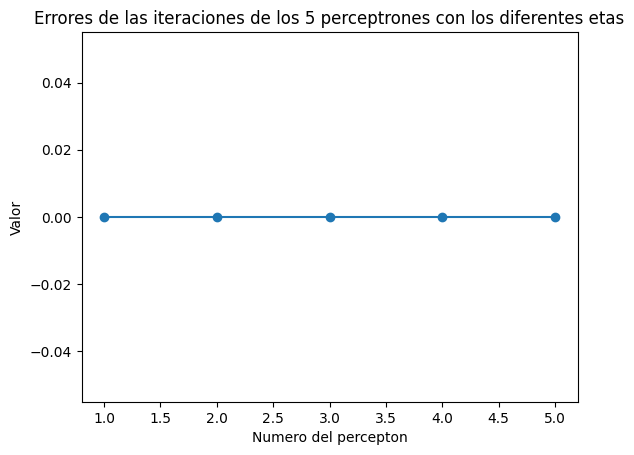

In [ ]:
yy = np.array([ppn[i].errors_[-1] for i in range(len(ppn))])
plt.plot(range(1, len(ppn) + 1), yy, marker='o')
plt.xlabel('Numero del percepton')
plt.ylabel('Valor')
plt.title('Errores de las iteraciones de los 5 perceptrones con los diferentes etas')
plt.show()


### División del perceptron

<ipython-input-108-468eca9d6a22>:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


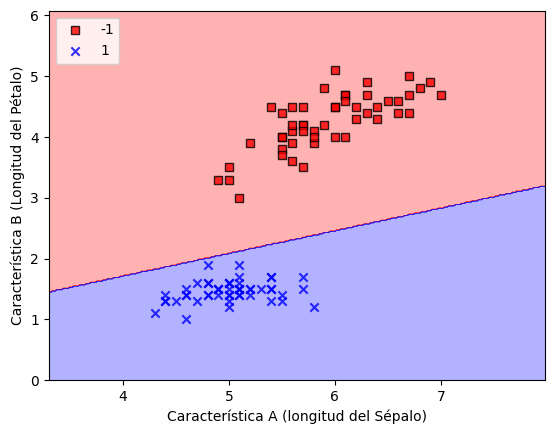

In [ ]:
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

plot_decision_regions(X, Y, classifier=ppn[-1])
plt.xlabel('Característica A (longitud del Sépalo)')
plt.ylabel('Característica B (Longitud del Pétalo)')
plt.legend(loc='upper left')
plt.show()


### Predicciones de los valores para completar la grafica

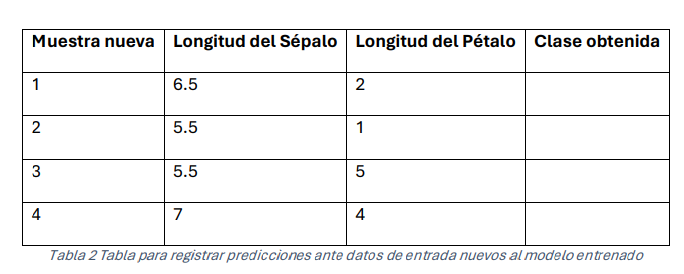

In [ ]:
valores_new = np.array([[6.5,2], [5.5,1], [5.5,5], [7,4]])

for key in valores_new:
  print(ppn[-1].predict(key))

1
1
-1
-1


Para la muestra 1: 1 \\
Para la muestra 2: 1 \\
Para la muestra 3: -1 \\
Para la muestra 4: -1 \\

## Separando los datos para el percepton con separación [1, 0]

In [ ]:
# Datos de entrada

X,Y = [],[]
for i in range(100):
  X.append([df[0][i], df[2][i]])

for key in df[4]:
  if key == "Iris-setosa": Y.append(1)
  elif key == "Iris-versicolor": Y.append(0)

# Etiquetas de salida deseadas
X = np.array(X)
Y = np.array(Y)


### Grafica

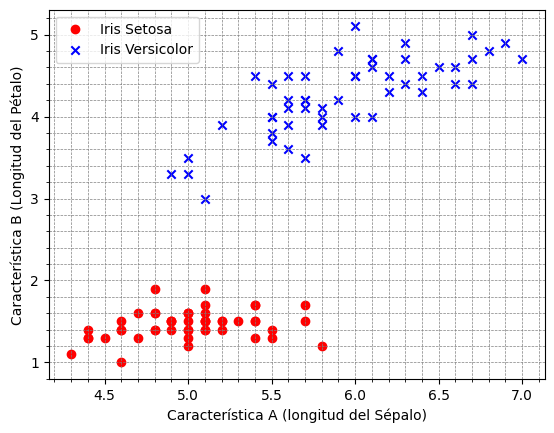

In [ ]:
# Graficar los datos de la tabla

graficar(X, Y, 1, 0)
plt.legend()
plt.show()

1.2162434536366322 2.0338824358634966 2.0338824358634966
1.6162434536366326 2.713882435863497 2.713882435863497
2.0162434536366325 3.393882435863497 3.393882435863497
2.4162434536366324 4.073882435863494 4.073882435863494
2.8162434536366323 4.753882435863496 4.753882435863496
[array([ 1.21624345,  2.03388244, -5.46528172]), array([ 1.61624345,  2.71388244, -7.28528172]), array([ 2.01624345,  3.39388244, -9.10528172]), array([  2.41624345,   4.07388244, -10.92528172]), array([  2.81624345,   4.75388244, -12.74528172])]


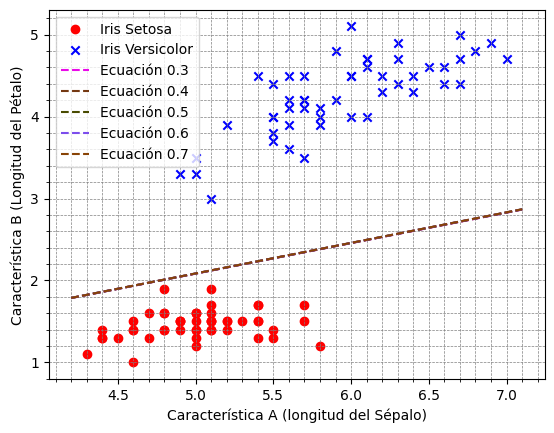

In [ ]:
graficar(X, Y, 1, 0)

ppn = []
Lw_historical = []
i = 0.3

# Obtener valores mínimo y máximo de la columna 1 de X
x1_min = np.min(X[:, 0])
x1_max = np.max(X[:, 0])
while i <= 0.7:
  ppn.append(Perceptron(eta=i, n_iter=20))
  ppn[-1].fit(X,y)
  Lw_historical.append(ppn[-1].w_historical[-1])

  # Generar x1
  X1 = np.linspace(x1_min - 0.1, x1_max + 0.1, 100)
  b= Lw_historical[-1][0]
  w1= Lw_historical[-1][1]
  w2= Lw_historical[-1][2]
  print(b, w1, w1)

  # Calcular los valores correspondientes de X2
  X2 = -(w1/w2) * X1 - (b/w2)

  # Graficar la ecuación
  plt.plot(X1, X2, color=rgb2hex(randint(0, 255), randint(0, 255), randint(0, 255)),
           linestyle='--', label=f'Ecuación {i}')
  i += 0.1

print(Lw_historical)

plt.legend()
plt.show()

### Grafico de los errores

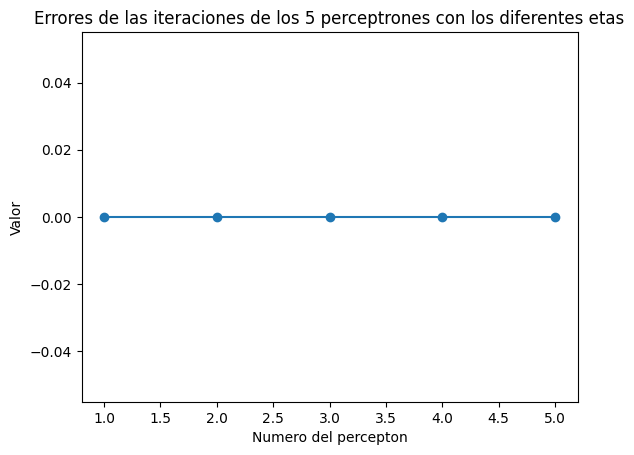

In [ ]:
yy = np.array([ppn[i].errors_[-1] for i in range(len(ppn))])
plt.plot(range(1, len(ppn) + 1), yy, marker='o')
plt.xlabel('Numero del percepton')
plt.ylabel('Valor')
plt.title('Errores de las iteraciones de los 5 perceptrones con los diferentes etas')
plt.show()


### División del perceptron

<ipython-input-108-468eca9d6a22>:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


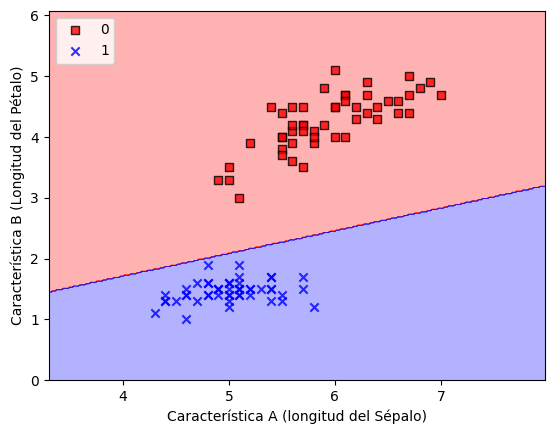

In [ ]:
plot_decision_regions(X, Y, classifier=ppn[-1])
plt.xlabel('Característica A (longitud del Sépalo)')
plt.ylabel('Característica B (Longitud del Pétalo)')
plt.legend(loc='upper left')
plt.show()


### Predicciones de los valores para completar la grafica

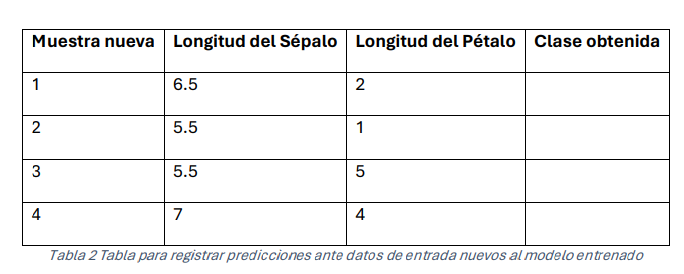

In [ ]:
#No sirve

valores_new = np.array([[6.5,2], [5.5,1], [5.5,5], [7,4]])
for key in valores_new:
  print(ppn[-1].predict(key))

1
1
-1
-1


In [ ]:
#Modelos entre varianza y Curtosis

x = data_set.iloc[:]

Xvc = data_set.iloc[:, [0, 2]].values
Xsc = data_set.iloc[:, [1, 2]].values

print(x)
print(Xvc)
print(Xsc)

y = data_set.iloc[:, [4]]
print(y)

y = np.where(y == 0, 0, 1)
print(y)

#Modelos entre skewnes y curtosis

Para la muestra 1: 1 \\
Para la muestra 2: 1 \\
Para la muestra 3: -1 \\
Para la muestra 4: -1 \\